In [1]:
termdir = "clir_evaluated/term"
fourgramdir = "clir_evaluated/4gram"
fivegramdir = "clir_evaluated/5gram"
alldirs = [termdir, fourgramdir, fivegramdir]
update_experiment_name = {
	"hi2en_emb": "embeddings +[oov transliteration]",
	"en_base": "monolingual base",
	"hi2en_emb_no_oov": "embeddings",
	"hi2en_gt": "mt",
	"hi2en_emb_synset": "embeddings +[oov transliteration, query expansion]",
}

In [2]:
import subprocess
import os
import re
import pandas as pd
data = []
for adir in alldirs:
    for root, dirs, files in os.walk(adir):
        for file in files:
            if file.endswith(".txt"):
                path = os.path.join(root, file)
                print(f"Evaluating {path}")
                feature_type = re.sub("clir_evaluated/", "", root)
                experiment = re.sub(f"trec_{feature_type}_rankedlist_", "", os.path.splitext(file)[0])
                input_type = experiment.split("_")[-1]
                experiment = re.sub(f"_{input_type}", "", experiment)
                maprec = None
                P_5 = -1
                P_10 = -1
                P_15 = -1
                P_20 = -1
                P_30 = -1
                P_100 = -1
                P_200 = -1
                P_500 = -1
                P_1000 = -1
                
                with open(path) as file:
                    lines = file.readlines()
                    for line in lines:
                        row = line.split()
                        if row[0] == "map":
                            maprec = row[2]
                        if row[0] == "P_5":
                            P_5 = row[2]
                        if row[0] == "P_10":
                            P_10 = row[2]
                        if row[0] == "P_15":
                            P_15 = row[2]
                        if row[0] == "P_20":
                            P_20 = row[2]
                        if row[0] == "P_30":
                            P_30 = row[2]
                        if row[0] == "P_100":
                            P_100 = row[2]
                        if row[0] == "P_200":
                            P_200 = row[2]
                        if row[0] == "P_500":
                            P_500 = row[2]
                        if row[0] == "P_1000":
                            P_1000 = row[2]
                    item = {
                        "feature_type": feature_type,
                        "input_type": input_type,
                        "experiment": update_experiment_name[experiment],
                        "map": float(maprec),
                        "P_5": float(P_5),
                        "P_10": float(P_10),
                        "P_15": float(P_15),
                        "P_20": float(P_20),
                        "P_30": float(P_30),
                        "P_100": float(P_100),
                        "P_200": float(P_200),
                        "P_500": float(P_500),
                        "P_1000": float(P_1000),
#                         "precision_at_k": [P_5, P_10, P_15, P_20, P_30, P_100, P_200, P_500, P_1000]
                    }
                    data.append(item)

Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_keywords.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_synset_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_en_base_keywords.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_no_oov_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_gt_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_en_base_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_no_oov_keywords.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_gt_keywords.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_synset_keywords.txt
Evaluating clir_evaluated/4gram/trec_4gram_rankedlist_hi2en_gt_keywords.txt
Evaluating clir_evaluated/4gram/trec_4gram_rankedlist_hi2en_emb_synset_questions.txt
Evaluating clir_evaluated/4gram/trec_4gram_rankedlist_hi2en_em

In [3]:
df = pd.DataFrame(data)
df

,feature_type,input_type,experiment,map,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,term,keywords,embeddings +[oov transliteration],0.0283,0.2286,0.2306,0.2299,0.2327,0.2224,0.2178,0.1089,0.0436,0.0218
1,term,questions,"embeddings +[oov transliteration, query expans...",0.0195,0.1600,0.1780,0.1787,0.1750,0.1733,0.1844,0.0922,0.0369,0.0184
2,term,keywords,monolingual base,0.0491,0.4280,0.4200,0.4147,0.4260,0.4200,0.3756,0.1878,0.0751,0.0376
3,term,questions,embeddings,0.0180,0.1520,0.1680,0.1707,0.1720,0.1787,0.1828,0.0914,0.0366,0.0183
4,term,questions,mt,0.0387,0.3560,0.3480,0.3533,0.3490,0.3473,0.2968,0.1484,0.0594,0.0297
5,term,questions,monolingual base,0.0519,0.4880,0.4700,0.4707,0.4650,0.4433,0.3902,0.1951,0.0780,0.0390
6,term,keywords,embeddings,0.0255,0.2122,0.2163,0.2163,0.2173,0.2068,0.2027,0.1013,0.0405,0.0203
7,term,questions,embeddings +[oov transliteration],0.0194,0.1560,0.1740,0.1787,0.1750,0.1727,0.1834,0.0917,0.0367,0.0183
8,term,keywords,mt,0.0348,0.3020,0.3245,0.3075,0.3071,0.3020,0.2700,0.1350,0.0540,0.0270
9,term,keywords,"embeddings +[oov transliteration, query expans...",0.0242,0.1878,0.1816,0.1946,0.2010,0.1939,0.1984,0.0992,0.0397,0.0198


In [4]:
cdf =  df[df["input_type"] == "questions"]
cdf =  cdf[cdf["feature_type"] == "5gram"]
cdf

,feature_type,input_type,experiment,map,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
21,5gram,questions,"embeddings +[oov transliteration, query expans...",0.0230,0.172,0.166,0.1827,0.191,0.1833,0.1834,0.0917,0.0367,0.0183
23,5gram,questions,mt,0.0441,0.408,0.376,0.3733,0.366,0.3620,0.3190,0.1595,0.0638,0.0319
24,5gram,questions,embeddings,0.0198,0.160,0.152,0.1707,0.177,0.1660,0.1622,0.0811,0.0324,0.0162
26,5gram,questions,monolingual base,0.0531,0.512,0.510,0.4853,0.486,0.4727,0.3920,0.1960,0.0784,0.0392
29,5gram,questions,embeddings +[oov transliteration],0.0230,0.172,0.166,0.1867,0.194,0.1833,0.1824,0.0912,0.0365,0.0182


# Keywords

In [5]:
kdf =  df[df["input_type"] == "keywords"]
kdf = kdf.drop("input_type", 1)
kdf = kdf.sort_values("map", ascending=True)
kdf

/var/folders/94/w8hsf0tx2sj4m56_ybvwlrtc0000gn/T/ipykernel_2705/3443223516.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  kdf = kdf.drop("input_type", 1)


,feature_type,experiment,map,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
20,5gram,embeddings,0.0172,0.1347,0.1224,0.1320,0.1296,0.1238,0.1310,0.0655,0.0262,0.0131
18,4gram,embeddings,0.0188,0.1224,0.1449,0.1483,0.1480,0.1483,0.1437,0.0718,0.0287,0.0144
28,5gram,embeddings +[oov transliteration],0.0196,0.1480,0.1320,0.1427,0.1450,0.1447,0.1500,0.0750,0.0300,0.0150
25,5gram,"embeddings +[oov transliteration, query expans...",0.0200,0.1320,0.1260,0.1453,0.1460,0.1500,0.1608,0.0804,0.0322,0.0161
16,4gram,embeddings +[oov transliteration],0.0211,0.1360,0.1580,0.1627,0.1650,0.1653,0.1664,0.0832,0.0333,0.0166
17,4gram,"embeddings +[oov transliteration, query expans...",0.0212,0.1520,0.1440,0.1533,0.1600,0.1607,0.1750,0.0875,0.0350,0.0175
9,term,"embeddings +[oov transliteration, query expans...",0.0242,0.1878,0.1816,0.1946,0.2010,0.1939,0.1984,0.0992,0.0397,0.0198
6,term,embeddings,0.0255,0.2122,0.2163,0.2163,0.2173,0.2068,0.2027,0.1013,0.0405,0.0203
0,term,embeddings +[oov transliteration],0.0283,0.2286,0.2306,0.2299,0.2327,0.2224,0.2178,0.1089,0.0436,0.0218
22,5gram,mt,0.0345,0.3240,0.2960,0.2920,0.2930,0.2920,0.2652,0.1326,0.0530,0.0265


In [6]:
ldf = kdf.drop("map", 1)
ldf

/var/folders/94/w8hsf0tx2sj4m56_ybvwlrtc0000gn/T/ipykernel_2705/1027522234.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ldf = kdf.drop("map", 1)


,feature_type,experiment,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
20,5gram,embeddings,0.1347,0.1224,0.1320,0.1296,0.1238,0.1310,0.0655,0.0262,0.0131
18,4gram,embeddings,0.1224,0.1449,0.1483,0.1480,0.1483,0.1437,0.0718,0.0287,0.0144
28,5gram,embeddings +[oov transliteration],0.1480,0.1320,0.1427,0.1450,0.1447,0.1500,0.0750,0.0300,0.0150
25,5gram,"embeddings +[oov transliteration, query expans...",0.1320,0.1260,0.1453,0.1460,0.1500,0.1608,0.0804,0.0322,0.0161
16,4gram,embeddings +[oov transliteration],0.1360,0.1580,0.1627,0.1650,0.1653,0.1664,0.0832,0.0333,0.0166
17,4gram,"embeddings +[oov transliteration, query expans...",0.1520,0.1440,0.1533,0.1600,0.1607,0.1750,0.0875,0.0350,0.0175
9,term,"embeddings +[oov transliteration, query expans...",0.1878,0.1816,0.1946,0.2010,0.1939,0.1984,0.0992,0.0397,0.0198
6,term,embeddings,0.2122,0.2163,0.2163,0.2173,0.2068,0.2027,0.1013,0.0405,0.0203
0,term,embeddings +[oov transliteration],0.2286,0.2306,0.2299,0.2327,0.2224,0.2178,0.1089,0.0436,0.0218
22,5gram,mt,0.3240,0.2960,0.2920,0.2930,0.2920,0.2652,0.1326,0.0530,0.0265


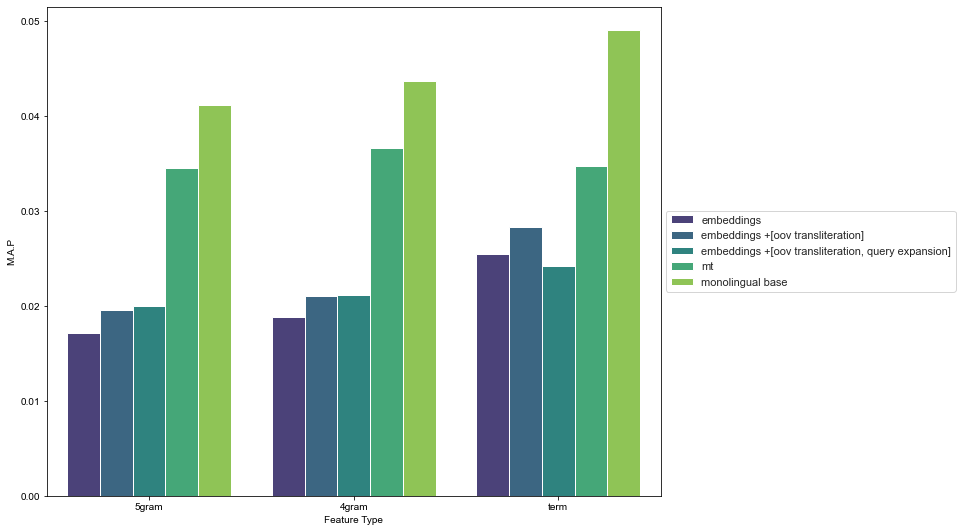

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(11, 9))
sns.set_theme(style="whitegrid")  
sns.barplot(data=kdf, hue="experiment", x="feature_type", y="map", palette="viridis") 
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
           loc="center left", 
           bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Feature Type")
plt.ylabel("M.A.P")
plt.show()


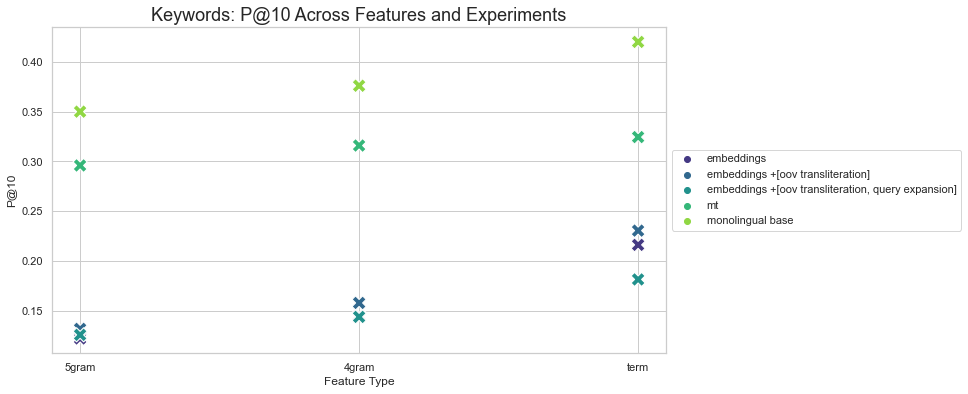

In [8]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.set_theme(style="whitegrid") 
sns.scatterplot(x="feature_type", y="P_10",
             hue="experiment",
             data=ldf,
             palette="viridis",
             marker="X", s=200)
plt.legend(
           loc="center left", 
           bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Feature Type")
plt.ylabel("P@10")
# title
title = 'Keywords: P@10 Across Features and Experiments'
plt.title(title, loc="center", fontsize=18)
plt.show()

# Questions

In [9]:
qdf = df[df["input_type"] == "questions"]
qdf = qdf.drop("input_type", 1)
qdf = qdf.sort_values("map", ascending=True)
qdf

/var/folders/94/w8hsf0tx2sj4m56_ybvwlrtc0000gn/T/ipykernel_2705/3555752060.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  qdf = qdf.drop("input_type", 1)


,feature_type,experiment,map,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
3,term,embeddings,0.0180,0.152,0.168,0.1707,0.172,0.1787,0.1828,0.0914,0.0366,0.0183
7,term,embeddings +[oov transliteration],0.0194,0.156,0.174,0.1787,0.175,0.1727,0.1834,0.0917,0.0367,0.0183
1,term,"embeddings +[oov transliteration, query expans...",0.0195,0.160,0.178,0.1787,0.175,0.1733,0.1844,0.0922,0.0369,0.0184
24,5gram,embeddings,0.0198,0.160,0.152,0.1707,0.177,0.1660,0.1622,0.0811,0.0324,0.0162
21,5gram,"embeddings +[oov transliteration, query expans...",0.0230,0.172,0.166,0.1827,0.191,0.1833,0.1834,0.0917,0.0367,0.0183
29,5gram,embeddings +[oov transliteration],0.0230,0.172,0.166,0.1867,0.194,0.1833,0.1824,0.0912,0.0365,0.0182
12,4gram,embeddings,0.0239,0.184,0.194,0.2040,0.201,0.2060,0.1970,0.0985,0.0394,0.0197
14,4gram,embeddings +[oov transliteration],0.0276,0.196,0.212,0.2240,0.228,0.2333,0.2234,0.1117,0.0447,0.0223
11,4gram,"embeddings +[oov transliteration, query expans...",0.0277,0.196,0.214,0.2253,0.230,0.2347,0.2254,0.1127,0.0451,0.0225
4,term,mt,0.0387,0.356,0.348,0.3533,0.349,0.3473,0.2968,0.1484,0.0594,0.0297


['embeddings', 'embeddings +[oov transliteration]', 'embeddings +[oov transliteration, query expansion]', 'mt', 'monolingual base']


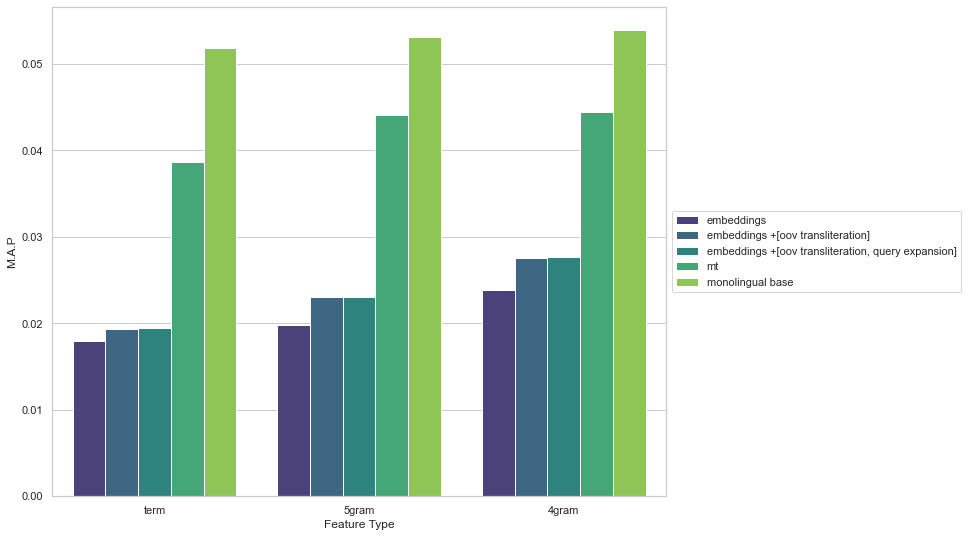

In [10]:
plt.subplots(figsize=(11, 9))
sns.set_theme(style="whitegrid")  
sns.barplot(data=qdf, hue="experiment", x="feature_type", y="map", palette="viridis") 
handles, labels = plt.gca().get_legend_handles_labels()
print(labels)
ordered_labels = ["base", "google translate", "google translate +[synset]","embeddings", 
                  "embeddings +[oov transliteration]", "embeddings +[oov transliteration, synset]"]
plt.legend(
#     labels=[labels[idx] for idx in order], 
#            handles=[handles[idx] for idx in order], 
           loc="center left", 
           bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Feature Type")
plt.ylabel("M.A.P")
# title
# title = 'Questions: Mean Average Precision'
# plt.title(title, loc="center", fontsize=18)
plt.show()



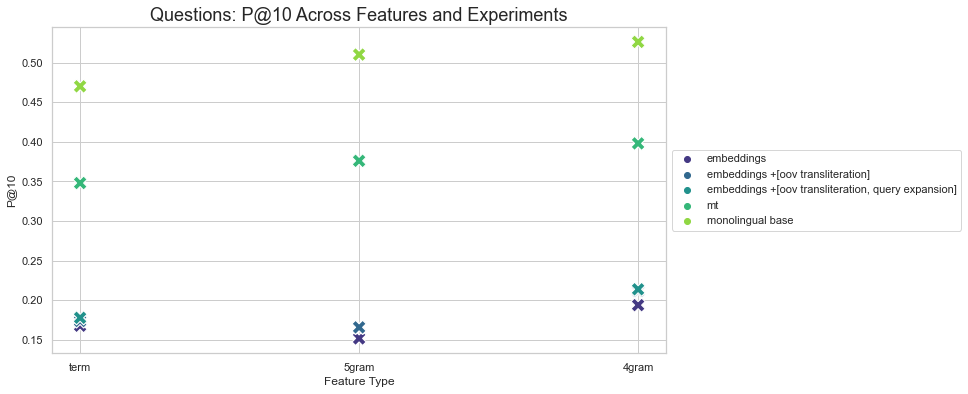

In [88]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.set_theme(style="whitegrid") 
sns.scatterplot(x="feature_type", y="P_10",
             hue="experiment",
             data=qdf,
             palette="viridis",
             marker="X", s=200)
plt.legend(
           loc="center left", 
           bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Feature Type")
plt.ylabel("P@10")
# title
title = 'Questions: P@10 Across Features and Experiments'
plt.title(title, loc="center", fontsize=18)
plt.show()